# Formes quadratiques

## Exercice (changement de bases)

On considère la matrice symétrique $3\times 3$ définie par
$$A=\begin{bmatrix} 1&2&3\\ 2&4&5\\ 3&5&6\end{bmatrix}$$
Soit $\mathcal{C}$ la base canonique de $\mathbb{R}^3$, et $\mathcal{E}=\left(\underline{e}_1,\underline{e}_2,\underline{e}_3\right)$ la base de $\mathbb{R}^3$ définie par 
$$\underline{e}_1=(1,1,-1),\quad \underline{e}_2=(0,1,1)\quad\text{et}\quad \underline{e}_3=(1,-1,1)$$
1. Écrire la matrice de passage $P_\mathcal{C}^{\mathcal{E}}$.
1. On suppose que $A$ est la matrice d'une forme quadratique $q$ dans la base $\mathcal{C}$, quelle est la matrice de $q$ dans la base $\mathcal{E}$ ?
1. On suppose que $A$ est la matrice d'un endomorphisme $u$ dans la base $\mathcal{C}$, quelle est la matrice de $u$ dans la base $\mathcal{E}$ ?
1. On suppose que $A$ est la matrice d'une application linéaire $u$ dans les bases $\mathcal{C}$ et $\mathcal{E}$, quelle est la matrice de $u$ dans les bases $\mathcal{E}$ et $\mathcal{B}$ ? Dans les bases $\mathcal{E}$ et $\mathcal{E}$ ?

In [1]:
import sympy as sp
sp.init_printing()

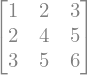

In [2]:
A = sp.Matrix([[1, 2, 3], [2, 4, 5], [3, 5, 6]])
A

**Question 1**

Par définition

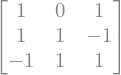

In [3]:
P = sp.Matrix([[1, 1, -1], [0, 1, 1], [1, -1, 1]]).transpose()
P

In [4]:
# C'est bien une matrice de changement de base !
P.det()

**Question 2**

C'est dans le cours $\,^tP\cdot A\cdot P$.

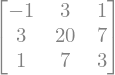

In [5]:
P.transpose()@A@P

**Question 3**

C'est dans le cours $P^{-1}\cdot A\cdot P$.

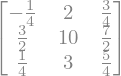

In [6]:
P.inv()@A@P

**Question 4**

1. Au départ, on change de base de $\mathcal{C}$ à $\mathcal{E}$, il faut donc utiliser $P\overset{\text{Not}}=P_\mathcal{C}^\mathcal{E}$. En revanche, à l'arrivée, il faut passer de la base $\mathcal{E}$ à la base $\mathcal{C}$, il faut donc utiliser $Q=P^{-1}$. La nouvelle matrice est donc
$$P\cdot A\cdot P$$
1. Même chose au départ, mais à l'arrivée, on ne change pas de base, donc $Q=I_3$. La nouvelle matrice est donc
$$I_3^{-1}\cdot A\cdot P=A\cdot P$$

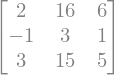

In [7]:
# Premier cas
P@A@P

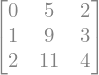

In [8]:
# Deuxième cas
A@P

## Exercice

Soit $E=\mathbb{R}^3$, on considère la forme quadratique définie par 
$$q\;:\:(x,y,z)\in\mathbb{R}^3\longmapsto 4\,x\,z-4\,y\,z$$
1. Quelle est la forme bilinéaire $B$, forme polaire de $q$ ?
1. Donner la matrice de $B$ dans la base canonique.
1. En utilisant la démonstration de la proposition 4.2, trouver une base de $\mathbb{R}^3$ telle que la matrice de $q$ dans cette base soit diagonale avec des éléments diagonaux dans $\{-1,0,+1\}$.

**Question 1**

On peut utiliser une des formules de polarisation. Si $(x,y,z)\in\mathbb{R}^3$ et $(x',y',z')\in\mathbb{R}^3$, alors
$$B\left((x,y,z),\left(x',y',z'\right)\right)=\frac{1}{2}\,\left(q\left(x+x',y+y',z+z'\right)-q\left(x,y,z\right)-q\left(x',y',z'\right)\right)$$

In [9]:
x, y, z, xp, yp, zp = sp.symbols("x y z x' y' z'", real=True)
q = sp.Lambda((x, y, z), 4*x*z-4*y*z)
((q(x+xp, y+yp, z+zp)-q(x, y, z)-q(xp, yp, zp))/2).simplify()

In [10]:
B = sp.Lambda(((x, y, z), (xp, yp, zp)), _)

**Question 2**

Par définition, si on note $(\underline{c}_1,\underline{c}_2,\underline{c}_3)$ les vecteurs de la base canonique, alors
$$\mathrm{Mat}(q,\mathcal{C})=\left[B\left(\underline{c}_i,\underline{c}_j\right)\right]_{(i,j)\in\{1,2,3\}^2}$$
Donc c'est 
$$\begin{bmatrix} 0&0&2\\ 0&0&-2\\ 2&-2&0\end{bmatrix}$$

**Question 3**

On constate sur la matrice précédente que 
$$\forall i\in\{1,2,3\},\; q\left(\underline{c}_i\right)=0$$
On ne peut donc pas initialiser la procédure avec l'un des vecteurs de la base canonique.

In [11]:
q(1, 0, 1)

On prend donc
$$\underline{e}_1=\left(\frac{1}{{2}},0,\frac{1}{{2}}\right)$$

In [12]:
E1 = (1/sp.S(2), 0, 1/sp.S(2))
q(*E1)  # Pour enlever les parenthèses dans l'appel, on met une * devant

In [13]:
# Calcul de l'orthogonal
B(E1, (x, y, z))

In [14]:
q(1, 2, 1)

In [15]:
E2 = (-1/sp.S(2), -1, -1/sp.S(2))
q(*E2), B(E1, E2)

In [16]:
# Calcul de l'orthogonal
B(E1, (x, y, z)), B(E2, (x, y, z))

In [17]:
sp.solve([_[0], _[1]], (x, y, z))

In [18]:
q(1, 1, 0)

In [19]:
E3 = (1, 1, 0)
B(E1, E3), B(E2, E3)

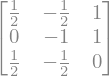

In [20]:
# La matrice de passage
P = sp.Matrix([list(E1), list(E2), list(E3)]).transpose()
P

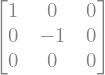

In [21]:
# Vérifions
P.transpose()@sp.Matrix([[0, 0, 2], [0, 0, -2], [2, -2, 0]])@P

## Exercice 

Soit $E$ un espace vectoriel de dimension finie $n$ et $q$ une forme quadratique sur $E$. On suppose que $q$ (de forme polaire $B$) est *non dégénérée*, c'est-à-dire qu'elle vérifie
$$\forall x\in E,\; \left[\forall y\in E,\; B(x,y)=0\right]\implies\left[x=0_{_E}\right]$$
On suppose de plus qu'il existe une sous-espace $H$ de dimension $p\in\mathbb{N}$ tel que
$$H=H^{\bot_q}$$
1. Montrer que $\dim(E)=2\,p$.
1. Montrer qu'il existe une base $\mathcal{B}$ de $E$ telle que
$$\mathrm{Mat}(q,\mathcal{B})=\left[\begin{array}{c|c} I_p&I_p\\ \hline I_p&0_p\end{array}\right]$$

**Question 1**

Comme $q$ est non dégénérée, son noyau est réduit à $\{0_{_E}\}$ et
$$\dim\left(H^{\bot_q}\right)=\dim(E)-\dim(H)$$
donc $n=2\,p$.

**Question 2**

Prenons une base $(e_1,\ldots,e_{2\,p})$ de $E$, où la matrice de $q$ est de la forme (pour un certain $k\in\{0,\ldots,2\,p\}$
$$\left[\begin{array}{c|c} I_k&0_{k,2\,p-k}\\ \hline 0_{2\,p-k,k}&-I_{2\,p-k}\end{array}\right]$$
Il ne peut y avoir de 0 sur la diagonale, car alors $q$ serait dégénérée.
1. *Nécessairement $k=p$*. En effet, supposons $k>p$, alors, d'après la formule de Grassman
$$H\cap \mathrm{Vect}\left(\left\{e_1,\ldots,e_k\right\}\right)\ne\{0_{_E}\}$$
ce qui est absurde, car si $x\in H$, $q(x)=0$ et si $x\in\mathrm{Vect}\left(\left\{e_1,\ldots,e_k\right\}\right)$, $q(x)>0$. (Si $k<p$, on travaille avec $\mathrm{Vect}\left(\left\{e_{k+1},\ldots,e_{2\,p}\right\}\right)$ pour obtenir une nouvelle contradiction. Donc
$$\mathrm{Mat}(q,(e_1,\ldots,e_{2\,p}))=\left[\begin{array}{c|c} I_p&0_p\\ \hline 0_p&-I_p\end{array}\right]$$
1. Il reste à montrer que
$$\left[\begin{array}{c|c} I_p&0_p\\ \hline 0_p&-I_p\end{array}\right]\equiv \left[\begin{array}{c|c} I_p&I_p\\ \hline I_p&0_p\end{array}\right]$$
Ce qui est immédiat en prenant 
$$P=\left[\begin{array}{c|c} I_p& I_p\\ \hline 0_p&I_p\end{array}\right]$$

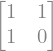

In [22]:
# On trouve P en regardant le cas p=1
P = sp.Matrix([[1, 1], [0, 1]])
A = sp.Matrix([[1, 0], [0, -1]])
P.transpose()@A@P